# Lancer de rayons (sujet Centrale 2021)

Sujet : [https://www.concours-centrale-supelec.fr/CentraleSupelec/2021/Multi/sujets/I007.pdf](https://www.concours-centrale-supelec.fr/CentraleSupelec/2021/Multi/sujets/I007.pdf)

In [17]:
import numpy as np
import plotly
import matplotlib.pyplot as plt

plotly.offline.init_notebook_mode(connected=True)  # pour export html

def point(x, y, z):
    return np.array([x, y, z])

# I Géométrie

In [30]:
# Q1
def vec(A, B):
    return np.array(B) - np.array(A)

array([ 3, -2,  0])

In [31]:
# Q2 
def ps(v1, v2):
    return np.sum(v1 * v2)

13

In [32]:
# Q3
def norme(v):
    return np.sqrt(np.sum(v**2))

5.0

In [33]:
# Q4
def unitaire(v):
    return v / norme(v)

array([0.8, 0. , 0.6])

In [34]:
# Q5
def pt(r, t):
    S, u = r
    return S + t * u

def dir(A, B):
    return unitaire(vec(A, B))

def ra(A, B):
    return A, dir(A, B)

In [35]:
# Q6
def sp(A, B):
    return (A, norme(B - A))

In [36]:
# Q8
def intersection(r, s):
    S, u = r
    C, r_s = s
    CS = vec(S, C)
    b = 2*ps(u, CS)
    delta = b**2 - 4*(norme(CS)**2 - r_s**2)
    if delta < 0:
        return None
    t1, t2 = -b - delta**0.5, -b + delta**0.5
    t = min(abs(t1), abs(t2))/2
    return S + t*u, t

(array([1.29289322, 1.29289322, 0.        ]), 1.8284271247461916)

# II Optique

Q 9. P est le premier point d'intersection d'un rayon partant de S et allant en P. (ou : Produit scalaire positif avec la normale au plan tangent)

In [59]:
# Q10
def au_dessus(s, P, src):
    return ps(vec(P, src), vec(s[0], P)) > 0

In [84]:
# Q11
def visible(obj, j, P, src):
    for i, o in enumerate(obj):
        inter = intersection(ra(src, P), o)
        if i != j and inter != None and inter[1] < norme(vec(src, P)):
            return False
    return au_dessus(obj[j], P, src)

In [40]:
# Q12
def couleur_diffusée(r, Cs, N, kd):
    cos = ps(-r[1], N)
    return cos*(Cs*kd)

In [88]:
# Q13
def rayon_réfléchi(s, P, src):
    C, r = s
    u = dir(src, P)
    N = dir(C, P)
    return P, 2*N + u

## Digression : affichage d'un rayon avec Plotly

In [89]:
import plotly.graph_objects as go

def line(P, Q):
    return go.Scatter3d(x=[P[0], Q[0]], y=[P[1], Q[1]], z=[P[2], Q[2]])

theta, phi = np.mgrid[0:2*np.pi:100j, 0:2*np.pi:100j]
s = (O, 1)
src = point(3, 3, 2)
P = point(1, 0, 0)
_, u = rayon_réfléchi(s, P, src)

fig = go.Figure(data=[ 
    line(src, P),
    go.Surface(x=np.cos(theta)*np.cos(phi), y=np.sin(theta)*np.cos(phi), z=np.sin(phi)),
    line(P, P + 3*u),
])
fig.show()

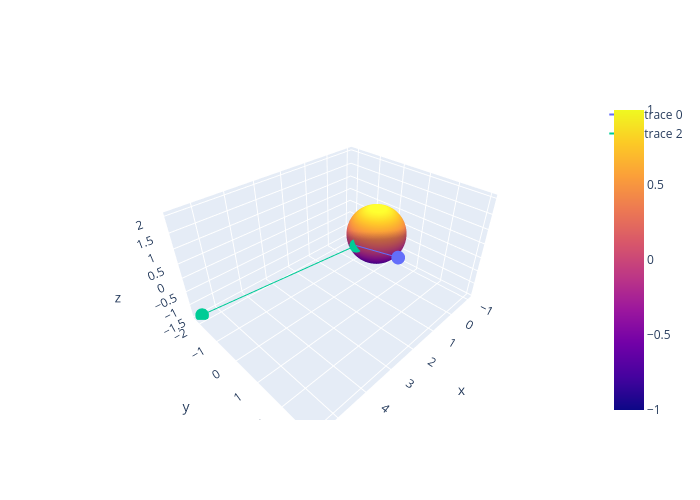

In [90]:
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)  # image statique

# Lancer de rayons

In [91]:
# Q18
def grille(i, j):
    return np.array([(Delta/N)*(j - N/2), (Delta/N)*(N/2 - i), 0])

In [45]:
# Q19
def rayon_écran(omega, i, j):
    return omega, dir(omega, grille(i, j))

In [46]:
# Q20
def interception(r, eviter=-1):
    # J'ai rajouté le 2ème paramètre pour la Question 25,
    # on ne cherche pas l'intersection avec l'objet d'indice eviter...
    x, minim = None, np.inf
    for i in range(len(Objet)):
        if i != eviter:
            t = intersection(r, Objet[i])
            if t != None and t[1] < minim:
                x, minim = (t[0], i), t[1]
    return x

In [47]:
# Q21
def couleur_diffusion(P, j):
    coul = np.array([.0, .0, .0])
    for i in range(len(Source)):
        if visible(Objet, j, P, Source[i]):
            coul += couleur_diffusée(ra(Source[i], Objet[j][0]), ColSrc[i], dir(Objet[j][0], P), KdObj[j])
    return coul

In [85]:
# Q22
def lancer(omega, fond):
    img = np.full((N, N, 3), fond, dtype=np.float64)
    for i in range(N):
        for j in range(N):
            inter = interception(rayon_écran(omega, i, j))
            if inter is not None:
                P, k = inter
                img[i, j] = couleur_diffusion(P, k)
    return img

In [92]:
Objet = [(np.array([0,5.5,-6]), 3)]
Objet.append((np.array([0.5,1.5,-2]), 1))
Objet.append((np.array([2,-3,-3]), 3))
Objet.append((np.array([-4,0,-3]), 2))
# Définition des couleurs de diffusion,
# objet par objet
KdObj = [np.array([0,1,0])]
KdObj.append(np.array([1,1,1]))
KdObj.append(np.array([0,0.8,1]))
KdObj.append(np.array([1,1,0]))
# Définition des sources lumineuses (positions)
Source = [np.array([-2,0,3])]
Source.append(np.array([3,0,3]))
# Définition des couleurs émises,
# source par source
ColSrc = [np.array([1,1,1])]
ColSrc.append(np.array([0,0,1]))
# Résolution de l'image et dimension de la grille
N = 1024
Delta = 10

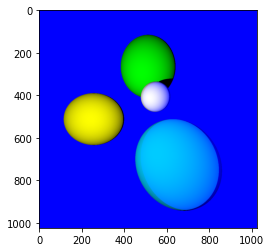

In [87]:
im = np.clip(lancer(np.array([0,0,4]), np.array([0,0,1])), .0, 1.)
plt.imshow(im)
# plt.imsave("ray.png")

# V Améliorations

In [93]:
# Q25
def réflexions(r, rmax):
    res = []
    I = interception(r)
    while len(res) < rmax + 1 and I != None:
        res.append(I)
        r = rayon_réfléchi(Objet[I[1]], I[0], r[0])
        I = interception(r, I[1])
    return res

In [94]:
# Q26
def couleur_perçue(r, rmax, fond):
    C = np.array([.0, .0, .0])  # noir
    refl = réflexions(r, rmax)[::-1]
    if not refl:
        return fond
    for P, i in refl:
        C = couleur_diffusion(P, i) + KrObj[i]*C
    return C

In [98]:
# Q27
def lancer_complet(omega, fond, rmax):
    img = np.full((N, N, 3), fond, dtype=np.float64)
    for i in range(N):
        for j in range(N):
            img[i, j] = couleur_perçue(rayon_écran(omega, i, j), rmax, fond)
    return np.clip(img, .0, 1.)

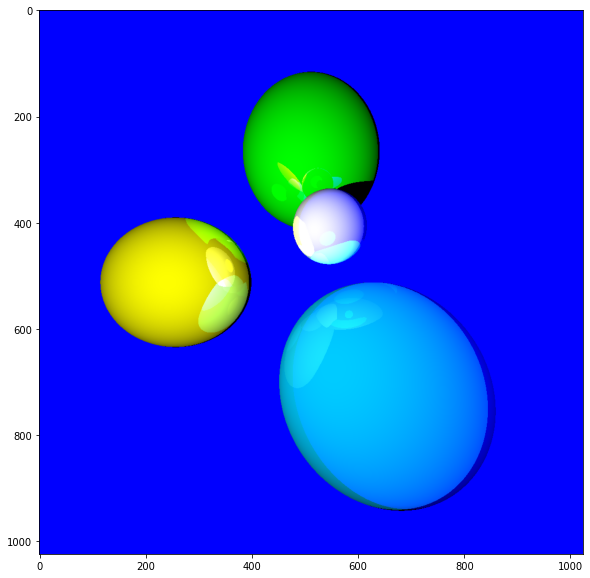

In [96]:
KrObj = [.8, 1., .1, .4]
im = np.clip(lancer_complet(np.array([0,0,4]), np.array([0,0,1]), 2), .0, 1.)
plt.figure(figsize = (20,10))
plt.imshow(im)
plt.imsave("ray.png", im)

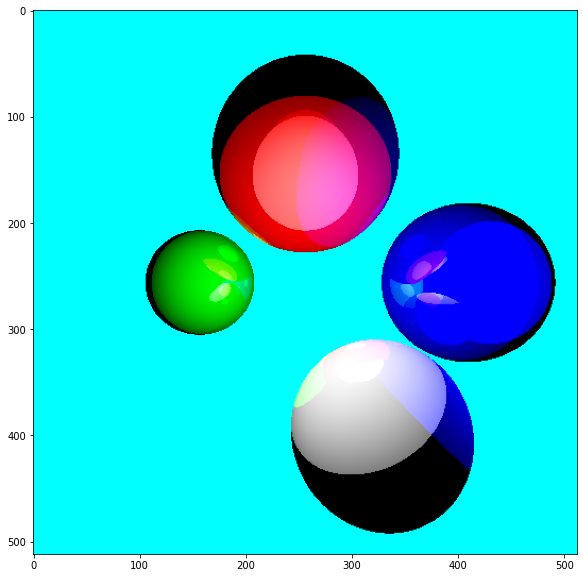

In [109]:
Objet = [
    (point(-2, 0, -3), 1),
    (point(3, 0, -3), 1.5),
    (point(0, 2, -2), 1.5),
    (point(1, -2, -1), 1.2),
    # (point(0, 2, -1), .4),
]
KdObj = [
    point(.0, 1., .0),
    point(.0, .0, 1.),
    point(1., .0, .0),
    point(1.0, 1.0, 1.0),
    # point(1.0, 1.0, 1.0),
]    
Source = [point(0, 0, 0), point(3, 0, -1)]
ColSrc = [point(1., 1., 1.0), point(.0, .0, 1.0)]
N = 512
Delta = 6
KrObj = [.5, .5, .5, .5]
im = lancer_complet(point(0, 0, 4), point(.0, 1., 1.), 2)
plt.figure(figsize = (20,10))
plt.imshow(im)

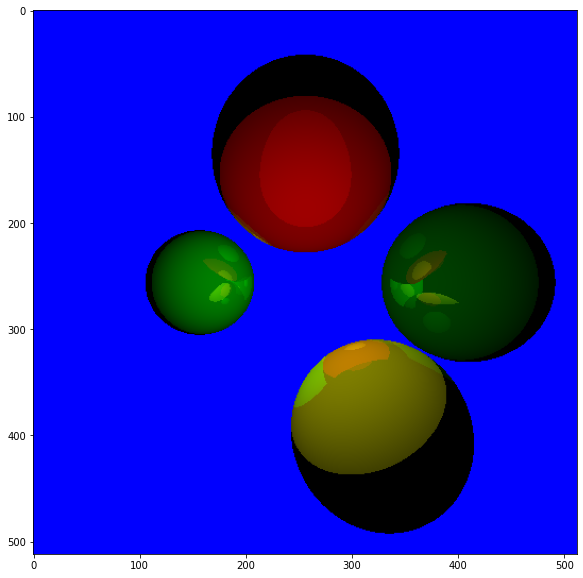

In [104]:
plt.figure(figsize = (20,10))
plt.imshow(im)